In [1]:
import numpy as np
import sklearn
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
%matplotlib inline

C:\Users\Kozyrevsky-V\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def encode_lable(y, num_classes):
    y_gt = np.zeros((len(y), num_classes))
    for i in range(0, len(y)):
        y_gt[i, y[i]] = 1
    return y_gt

In [3]:
(dx_train, dy_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print('x_train shape:', dx_train.shape)
print(dx_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
dy_train = encode_lable(dy_train, 10)
y_test = encode_lable(y_test, 10)

In [6]:
dx_train = np.asarray([list(x.flat) for x in dx_train])
x_test = np.asarray([list(x.flat) for x in x_test])

In [7]:
p = np.random.permutation(dx_train.shape[0])
x_train = dx_train[p[0:int(len(dx_train)*0.8)], :]
y_train = dy_train[p[0:int(len(dx_train)*0.8)]]
x_val = dx_train[p[int(len(dx_train)*0.8):], :]
y_val = dy_train[p[int(len(dx_train)*0.8):]]
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 3072)
y_train shape: (40000, 10)
x_val shape: (10000, 3072)
y_val shape: (10000, 10)
x_test shape: (10000, 3072)
y_test shape: (10000, 10)


In [8]:
x_train = (x_train - np.mean(x_train, axis = 0)) / np.var(x_train, axis = 0)
x_val = (x_val - np.mean(x_val, axis = 0)) / np.var(x_val, axis = 0)
x_test = (x_test - np.mean(x_test, axis = 0)) / np.var(x_test, axis = 0)

In [47]:
model = Sequential()
#model.add(Dense(10, activation='sigmoid', input_dim=3072))
model.add(Dense(128, activation='tanh', input_dim=3072))
model.add(Dropout(0.5))
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [54]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=1000)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 5s 125us/step - loss: 1.0992 - acc: 0.6030 - val_loss: 1.3255 - val_acc: 0.5482
Epoch 2/10
40000/40000 [==============================] - 5s 124us/step - loss: 1.1022 - acc: 0.6023 - val_loss: 1.3128 - val_acc: 0.5543
Epoch 3/10
40000/40000 [==============================] - 5s 125us/step - loss: 1.1004 - acc: 0.6042 - val_loss: 1.3195 - val_acc: 0.5482
Epoch 4/10
40000/40000 [==============================] - 5s 124us/step - loss: 1.1027 - acc: 0.6000 - val_loss: 1.3270 - val_acc: 0.5485
Epoch 5/10
40000/40000 [==============================] - 5s 127us/step - loss: 1.0959 - acc: 0.6074 - val_loss: 1.3221 - val_acc: 0.5514
Epoch 6/10
40000/40000 [==============================] - 5s 128us/step - loss: 1.0999 - acc: 0.6046 - val_loss: 1.3196 - val_acc: 0.5490
Epoch 7/10
40000/40000 [==============================] - 5s 124us/step - loss: 1.0966 - acc: 0.6043 - val_loss: 1.3130 - 

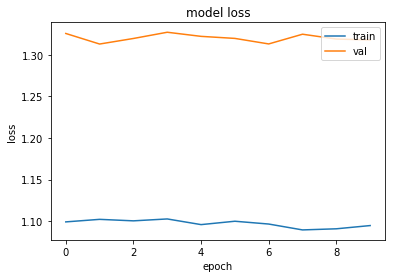

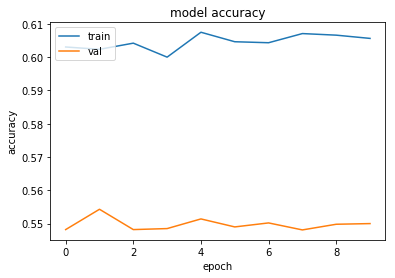

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
'''
--------Without hidden layers--------
Test loss: 1.7369774152755737
Test accuracy: 0.3934
--------One hidden 64 layer-------
Test loss: 1.452355881881714
Test accuracy: 0.4857
'''
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 100us/step
Test loss: 1.3047664316177368
Test accuracy: 0.5517


In [59]:
y_predict = model.predict(x_test)
f = open('results_Kozyrevskii5710M.txt','w')
for y in y_predict:
    f.write(str(np.argmax(y))+'\n')
f.close()